In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
df = pd.read_csv('car driving risk analysis.csv')

In [48]:
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [49]:
df.head() #It will show by default 5 values

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


In [50]:
df.head(10)

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [51]:
df.shape #rows,column

(15, 2)

In [52]:
df.isnull().any()  #If there is any null values

speed    False
risk     False
dtype: bool

In [53]:
df.isnull().sum()  #another way to check null values

speed    0
risk     0
dtype: int64

In [68]:
x= df[['speed']] #speed two dimensional so there is two third bracket
y= df['risk']

In [69]:
x

,speed
0,200
1,90
2,300
3,110
4,240
5,115
6,50
7,230
8,190
9,260


In [70]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

Text(0.5, 1.0, 'Risk analysis')

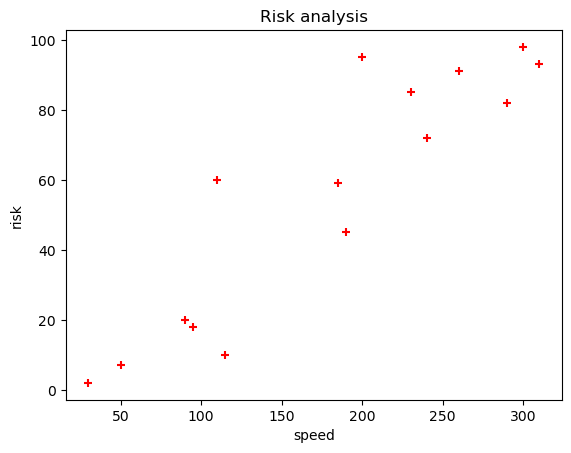

In [71]:
plt.scatter(df['speed'],df['risk'], marker='+',color='red')
plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Risk analysis')

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
#train test split
xtrain, xtest, ytrain, ytest= train_test_split(x,y, test_size=0.6, random_state=1)

In [84]:
xtrain

,speed
14,30
9,260
8,190
12,310
11,185
5,115


In [75]:
ytrain

14     2
9     91
8     45
12    93
11    59
5     10
Name: risk, dtype: int64

In [76]:
xtest

,speed
3,110
7,230
6,50
2,300
10,290
4,240
1,90
13,95
0,200


In [77]:
ytest

3     60
7     85
6      7
2     98
10    82
4     72
1     20
13    18
0     95
Name: risk, dtype: int64

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()

In [80]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [94]:
y_test_prediction= reg.predict(xtest)
y_test_prediction

array([23.31798537, 67.99484707,  0.97955452, 94.05634973, 90.33327793,
       71.71791888, 15.87184176, 17.73337766, 56.82563165])

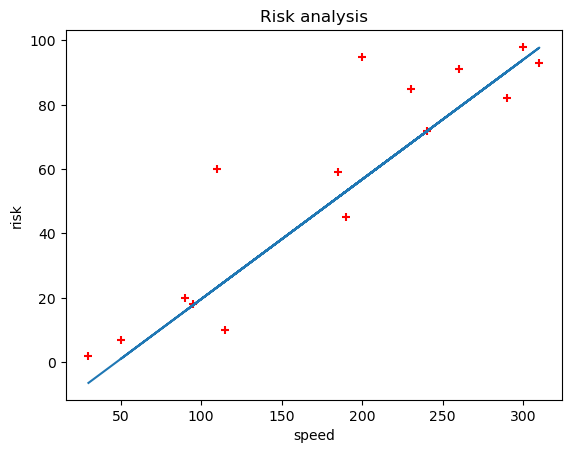

In [86]:
plt.scatter(df['speed'],df['risk'], marker='+',color='red')
plt.xlabel('speed')
plt.ylabel('risk')
plt.title('Risk analysis')
plt.plot(df['speed'],reg.predict(df[['speed']]))

In [88]:
reg.predict([[200]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56.82563165])

In [89]:
reg.coef_

array([0.37230718])

In [90]:
reg.intercept_

-17.63580452127661

In [91]:
y=0.37230718*200-17.63580452127661
y

56.825631478723395

In [92]:
# for accuracy test
from sklearn.metrics import r2_score

In [95]:
#checking r squared value
r_squared=r2_score(ytest,y_test_prediction)
r_squared

0.6799621723740829